In [1]:
from time import process_time
from collections import namedtuple
from scipy import stats
from numpy.random import randint
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_sample(sample_max_size = 2 ** 32, 
               random_size = True, element_range=(0, 2 ** 16), value_type=int):
    """
    Generate a pseudo-random sample of size `sample_max_size` if `random_size`
    is False, otherwise a pseudo-random size from 0 to `sample_max_size` -1
    Each element of the sample falls in the range defined by the `element_range`
    param and belongs to the type `value_type`
    """
    
    
    sample_size = randint(0, sample_max_size) if random_size else sample_max_size
    return randint(low=element_range[0], size=sample_size,
                   high=element_range[1], dtype=value_type)

In [3]:
def clf_function(a, b):
    return a > b

In [4]:
def bubble_sort(elements, clf_function):
    
    length = len(elements)
    for i in range(length):
        swapped = False
        for j in range(length - i -1):
            if clf_function(elements[j], elements[j+1]):
                elements[j], elements[j+1] = elements[j+1], elements[j]
                swapped = True
        if not swapped:
            break
    return elements

In [5]:
def performance_test(sample, clf_function):
    built_in_time_0 = process_time()
    built_in_sorted_list = sorted(sample)
    built_in_delta = process_time() - built_in_time_0

    comparison_time_0 = process_time()
    comparison_sorted_list = bubble_sort(sample, clf_function)
    comparison_delta = process_time() - comparison_time_0
    
    Result_test = namedtuple('Test', 'elements, delta_time')
    built_in = Result_test(built_in_sorted_list, built_in_delta)
    cmp = Result_test(comparison_sorted_list, comparison_delta)
    
    return (built_in, cmp)

In [6]:
def effectiveness_test(pattern, sample, quiet_mode=False):
    if any(pattern != sample):
        for p, s in zip(pattern, sample):
            if p != s and not quiet_mode:
                print("{}/{}".format(p, s))
        return False
    else:
        if not quiet_mode:
            print("Success")
        return True

In [7]:
def run_tests(algorithm, clf_function, sample_size=128, test_size=1024):
    
    errors = 0
    built_in_time = []
    comparison_time = []

    for test in range(test_size):
        sample = get_sample(sample_size, random_size=False)
        pattern, sample = performance_test(sample, clf_function)
        if effectiveness_test(pattern.elements, sample.elements, quiet_mode=True):
            built_in_time.append(pattern.delta_time)
            comparison_time.append(sample.delta_time)
        else:
            errors += 1
    
    
    return (errors, built_in_time, comparison_time)

In [8]:
def comparison_report(pattern, comparison):
    pattern_summary = stats.describe(pattern)
    comparison_summary = stats.describe(comparison)

    print('Built in average time:    {:16.8f}\n'
          'Comparison average time:  {:16.8f}\n'
          'Relative mean efficience: {:16.8f}'.
          format(
                pattern_summary.mean,
                comparison_summary.mean,
                comparison_summary.mean / pattern_summary.mean
           )
    )

    print('-' * 80)

    print('Built in variance time:   {:20.12f}\n'
          'Comparison variance time: {:20.12f}\n'
          'Relative variance:        {:20.12f}'.
          format(
                pattern_summary.variance,
                comparison_summary.variance,
                comparison_summary.variance / pattern_summary.variance
           )
    )
    
    return (pattern_summary.mean, comparison_summary.mean)

In [9]:
def plot_pattern_time(pattern_time, test_size, sample_size):
    plt.xlabel("{} runs of sample Size: {}".format(test_size, sample_size))
    plt.ylabel("$Elapsed \quad  Time$")
    plt.title("Built in Sort")
    plt.plot(
        pattern_time, "b{}-".format("o" if test_size < 25 else "")
    )
    maximal = max(pattern_time)
    minimal = min(pattern_time)
    plt.plot(
        [maximal] * test_size, "{}-".format("o" if test_size < 25 else ""),
        label="Max: {:.6f}".format(maximal)
    )
    plt.plot(
        [minimal] * test_size, "{}-".format("o" if test_size < 25 else ""),
        label="Min: {:.6f}".format(minimal)
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.axis([-.1, test_size - .9, 0, maximal * 1.5])
    plt.grid(True)

In [10]:
def plot_cmp_time(cmp_time, test_size, sample_size):    
    plt.xlabel("{} runs of sample Size: {}".format(test_size, sample_size))
    plt.ylabel("$Elapsed \quad  Time$")
    plt.title("Bubble sort")
    plt.plot(
        cmp_time, "r{}-".format("o" if test_size < 25 else ""),
    )
    maximal, minimal = max(cmp_time), min(cmp_time)
    plt.plot(
        [maximal] * test_size, "{}-".format("o" if test_size < 25 else ""),
        label="Max: {:.6f}".format(maximal)
    )
    plt.plot(
        [minimal] * test_size, "{}-".format("o" if test_size < 25 else ""),
        label="Min: {:.6f}".format(minimal)
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.axis([-.1, test_size - .9, 0, maximal * 1.5])
    plt.grid(True)


In [11]:
def plot_both_times(pattern_time, cmp_time, test_size, sample_size):
    plt.xlabel("{} runs of sample Size: {}".format(test_size, sample_size))
    plt.ylabel("$Elapsed \quad  Time$")
    plt.title("Relative performance")
    plt.plot(
        pattern_time, "b{}-".format("o" if test_size < 25 else ""), label="Built in Sort"
    )
    plt.plot(
        cmp_time, "r{}-".format("o" if test_size < 25 else ""), label="Bubble Sort"
    )
    plt.legend(loc="upper right")
    maximal = max(cmp_time + pattern_time)
    plt.axis([-.1, test_size - .9, 0, maximal * 1.5])
    plt.grid(True)

In [12]:
def plot_quotient_relation(pattern_timem, cmp_time, test_size, sample_size):
    plt.xlabel("{} runs of sample Size: {}".format(test_size, sample_size))
    plt.ylabel("$Relative \quad Elapsed \quad  Time$")
    plt.title("Bubble sort / Built in Sort")
    ratios = [bubble / cmp for bubble, cmp in zip(cmp_time, pattern_time)]
    plt.plot(ratios, "g{}-".format("o" if test_size < 25 else ""))

    maximal = max(ratios)
    minimal = min(ratios)
    plt.plot(
        [maximal] * test_size, "{}-".format("o" if test_size < 25 else ""),
        label="Max: {:.6f}".format(maximal)
    )
    plt.plot(
        [minimal] * test_size, "{}-".format("o" if test_size < 25 else ""),
        label="Min: {:.6f}".format(minimal)
    )
    plt.plot(
        [1] * test_size, "{}-".format("o" if test_size < 25 else ""), label="1"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.axis([-.1, test_size - .9, 0, maximal * 1.5])
    plt.grid(True)

In [13]:
def plot_graphics(pattern_time, cmp_time, test_size, sample_size):
    # Built in sort method
    plt.subplot(221)
    plot_pattern_time(pattern_time, test_size, sample_size)

    # Bubble sort
    plt.subplot(222)
    plot_cmp_time(cmp_time, test_size, sample_size)

    # Both Bubble and Built in sort
    plt.subplot(223)
    plot_both_times(pattern_time, cmp_time, test_size, sample_size)

    # Ratio between Bubble Sort / Built in Sort
    plt.subplot(224)
    plot_quotient_relation(pattern_time, cmp_time, test_size, sample_size)

    plt.subplots_adjust(top=1.5, bottom=0, left=0.10, right=1.95, hspace=.5, wspace=.75)
    plt.show()

In [14]:
def plot_pattern_growth(suite_cases, pattern_time, suite_size):
    plt.xlabel("Test suite size".format(len(growth_behaviour)))
    plt.ylabel("$Average \quad Elapsed \quad  Time$")
    plt.title("Average performance per suite")
    
    plt.plot(
        suite_cases, pattern_time, "b{}-".
        format("o" if suite_size < 25 else ""), label="Built in Sort"
    )
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.grid(True)

In [15]:
def plot_cmp_growth(suite_cases, cmp_time, suite_size):
    plt.xlabel("Test suite size".format(len(growth_behaviour)))
    plt.ylabel("$Average \quad Elapsed \quad  Time$")
    plt.title("Average performance per suite")
    
    plt.plot(
        suite_cases, cmp_time, "r{}-".
        format("o" if suite_size < 25 else ""), label="Bubble Sort"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.grid(True)

In [16]:
def plot_both_growth_times(suite_cases, pattern_time, cmp_time, suite_size):
    plt.xlabel("Test suite size".format(len(growth_behaviour)))
    plt.ylabel("$Average \quad Elapsed \quad  Time$")
    plt.title("Average performance per suite")
    
    plt.plot(
        suite_cases, cmp_time, "r{}-".
        format("o" if suite_size < 25 else ""), label="Bubble Sort"
    )
    plt.plot(
        suite_cases, pattern_time, "b{}-".
        format("o" if suite_size < 25 else ""), label="Built in Sort"
    )
    
    plt.legend(loc="upper left")
    plt.grid(True)

In [17]:
def plot_growth_graphics(growth_behaviour):
    suite_size = len(growth_behaviour)
    suite_cases = [entry.sample_size for entry in growth_behaviour]
    pattern_time = [entry.pattern_average for entry in growth_behaviour]
    cmp_time = [entry.cmp_average for entry in growth_behaviour]
    
    # Built in sort method
    plt.subplot(221)
    plot_pattern_growth(suite_cases, pattern_time, suite_size)

    # Bubble sort
    plt.subplot(222)
    plot_cmp_growth(suite_cases, cmp_time, suite_size)

    # Both Bubble and Built in sort
    plt.subplot(223)
    plot_both_growth_times(suite_cases, pattern_time, cmp_time, suite_size)

    plt.subplots_adjust(top=1.5, bottom=0, left=0.10, right=1.95, hspace=.5, wspace=.75)
    plt.show()

In [18]:
AverageTime = namedtuple('AverageTime', 'pattern_average, cmp_average, sample_size')
growth_behaviour = []

## Running 2048 times a sample with 1 element

In [19]:
sample_size = 1
test_size = 2048

In [20]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 1


In [21]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00000951
Comparison average time:        0.00000531
Relative mean efficience:       0.55812288
--------------------------------------------------------------------------------
Built in variance time:         0.000000000030
Comparison variance time:       0.000000000003
Relative variance:              0.115763944476


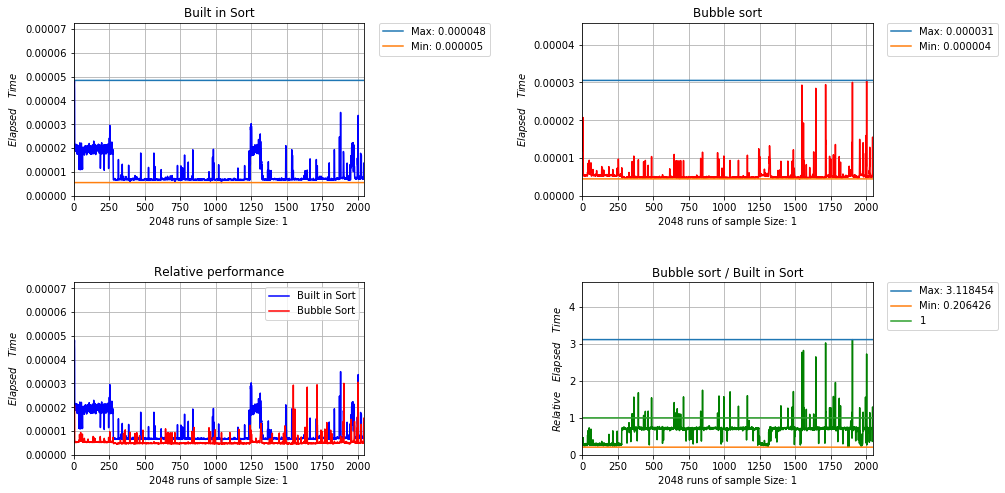

In [22]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 2 elements

In [23]:
sample_size = 2
test_size = 2048

In [24]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 2


In [25]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00000853
Comparison average time:        0.00001346
Relative mean efficience:       1.57727065
--------------------------------------------------------------------------------
Built in variance time:         0.000000000007
Comparison variance time:       0.000000000068
Relative variance:             10.225387472706


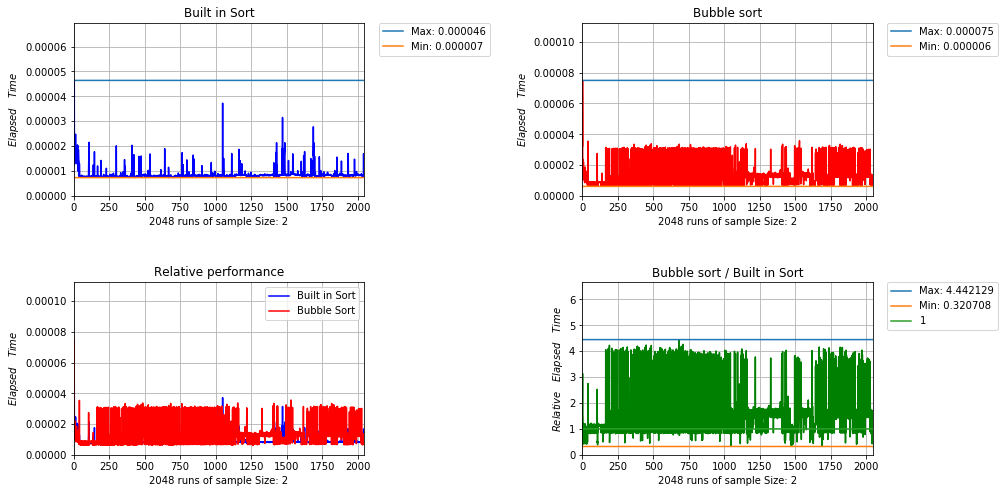

In [26]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 4 elements

In [27]:
sample_size = 4
test_size = 2048

In [28]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 4


In [29]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00000907
Comparison average time:        0.00001986
Relative mean efficience:       2.18987457
--------------------------------------------------------------------------------
Built in variance time:         0.000000000018
Comparison variance time:       0.000000000068
Relative variance:              3.765173578284


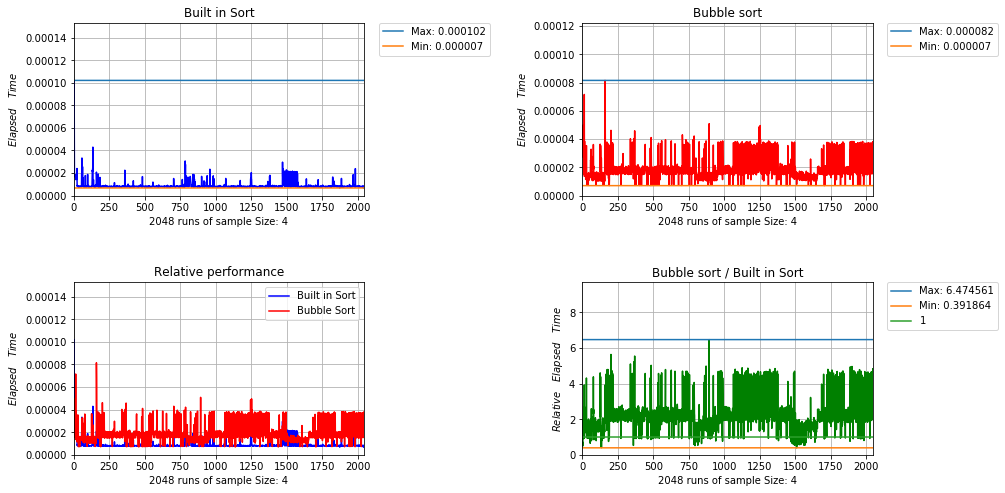

In [30]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 8 elements

In [31]:
sample_size = 8
test_size = 2048

In [32]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 8


In [33]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00000959
Comparison average time:        0.00004230
Relative mean efficience:       4.41138337
--------------------------------------------------------------------------------
Built in variance time:         0.000000000010
Comparison variance time:       0.000000000116
Relative variance:             12.050164637311


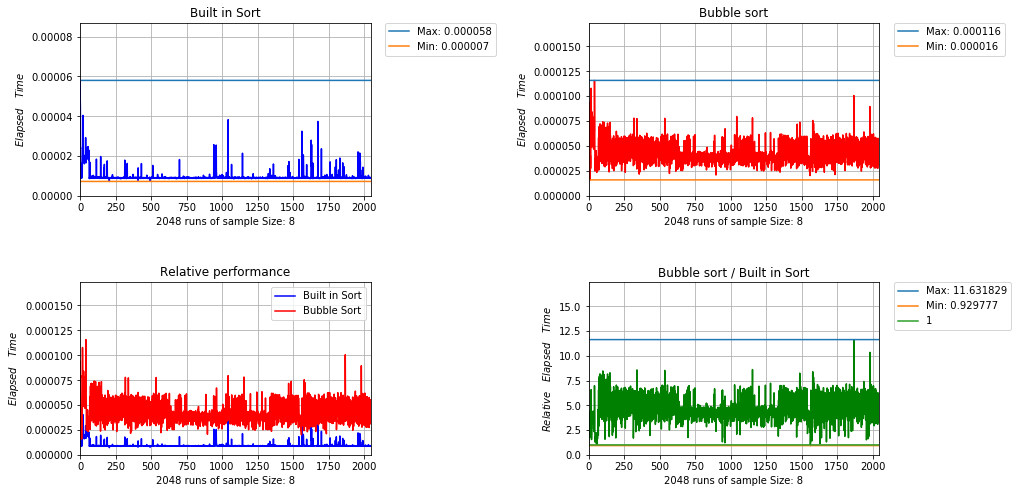

In [34]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 16 elements

In [35]:
sample_size = 16
test_size = 2048

In [36]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 16


In [37]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00002190
Comparison average time:        0.00016467
Relative mean efficience:       7.52087133
--------------------------------------------------------------------------------
Built in variance time:         0.000000000126
Comparison variance time:       0.000000003390
Relative variance:             26.948900780530


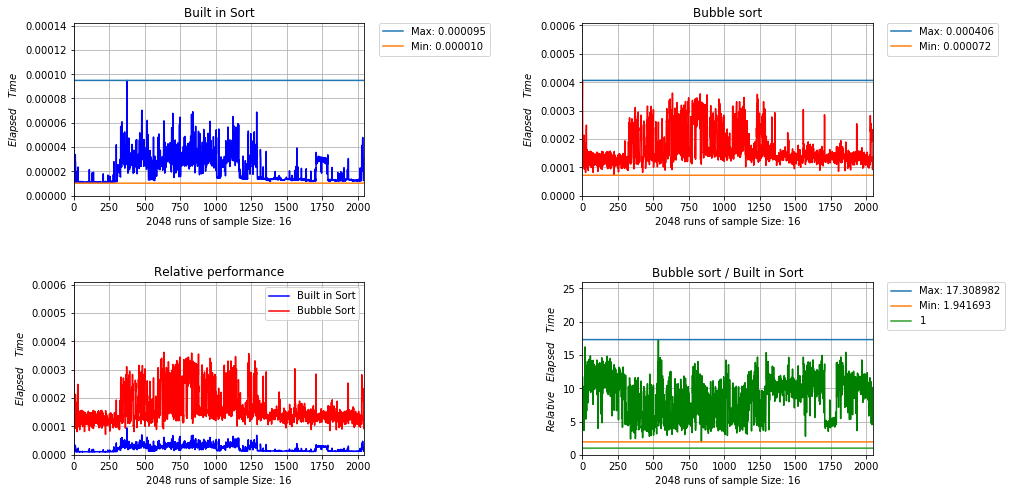

In [38]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 32 elements

In [39]:
sample_size = 32
test_size = 2048

In [40]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 32


In [41]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00002306
Comparison average time:        0.00053421
Relative mean efficience:      23.16634902
--------------------------------------------------------------------------------
Built in variance time:         0.000000000077
Comparison variance time:       0.000000014003
Relative variance:            181.066489856340


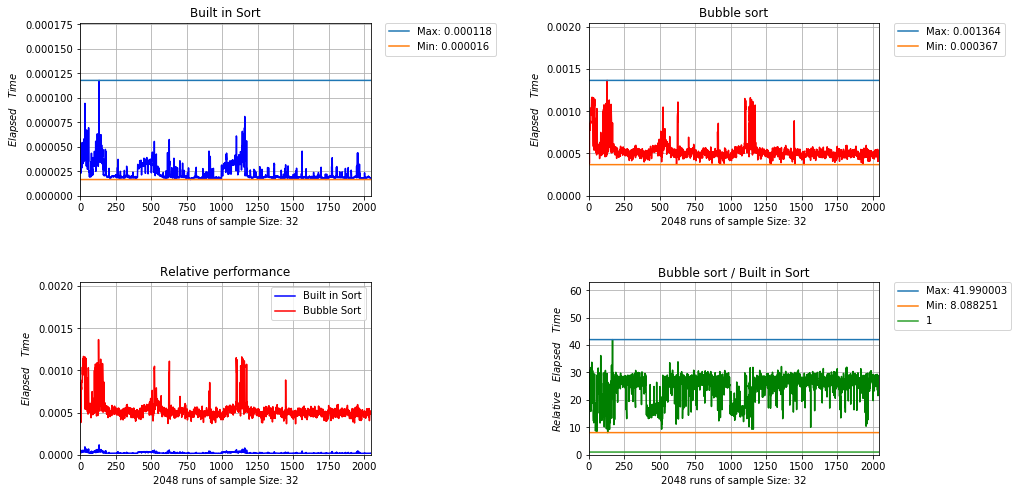

In [42]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 64 elements

In [43]:
sample_size = 64
test_size = 2048

In [44]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 64


In [45]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00004267
Comparison average time:        0.00210524
Relative mean efficience:      49.34108239
--------------------------------------------------------------------------------
Built in variance time:         0.000000000087
Comparison variance time:       0.000000158492
Relative variance:           1823.793555570494


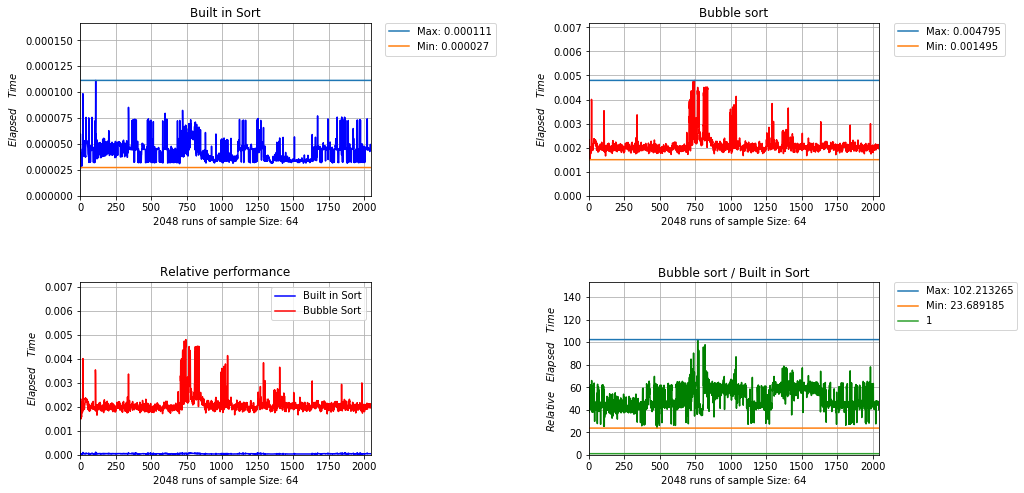

In [46]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 128 elements

In [47]:
sample_size = 128
test_size = 2048

In [48]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 128


In [49]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00005896
Comparison average time:        0.00749469
Relative mean efficience:     127.11862077
--------------------------------------------------------------------------------
Built in variance time:         0.000000000070
Comparison variance time:       0.000001066910
Relative variance:          15313.202070742189


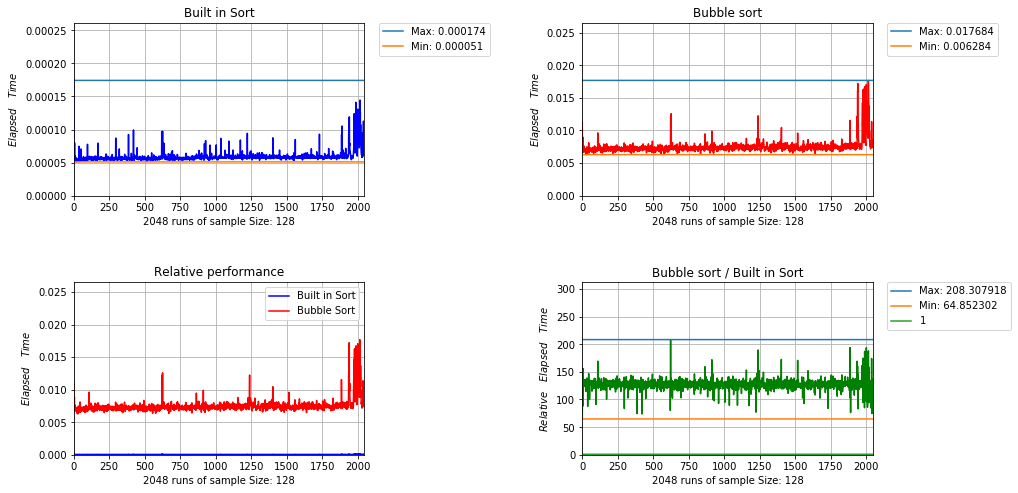

In [50]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 256 elements

In [51]:
sample_size = 256
test_size = 2048

In [52]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 256


In [53]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00014472
Comparison average time:        0.03598095
Relative mean efficience:     248.62436814
--------------------------------------------------------------------------------
Built in variance time:         0.000000000579
Comparison variance time:       0.000031299492
Relative variance:          54043.124630380749


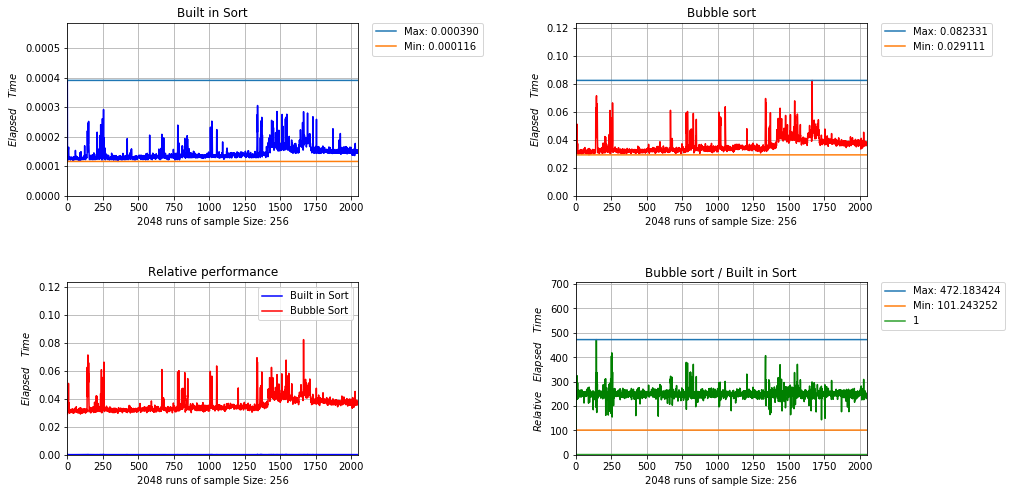

In [54]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 512 elements

In [55]:
sample_size = 512
test_size = 2048

In [56]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 512


In [57]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00036892
Comparison average time:        0.18027627
Relative mean efficience:     488.65617516
--------------------------------------------------------------------------------
Built in variance time:         0.000000007889
Comparison variance time:       0.001902137979
Relative variance:         241105.701796587207


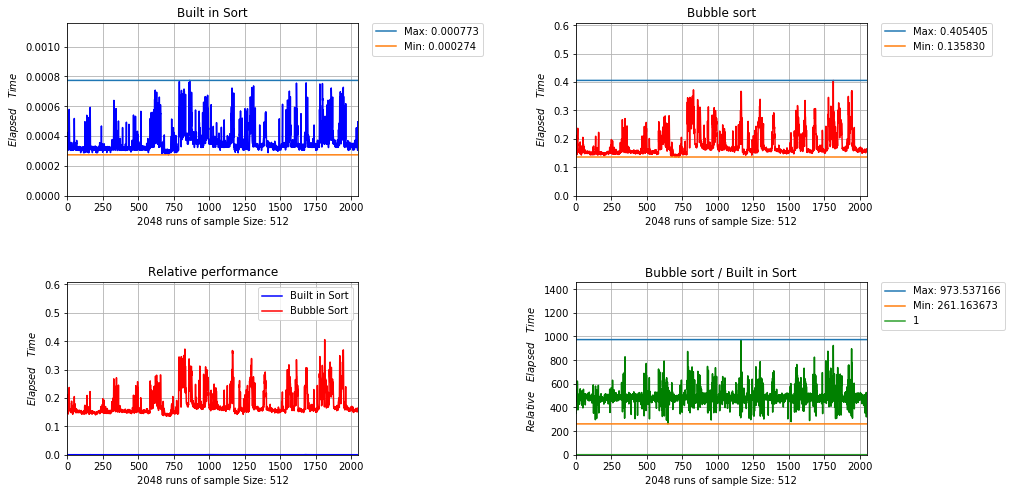

In [58]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 1024 elements

In [59]:
sample_size = 1024
test_size = 2048

In [60]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 1024


In [61]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00079435
Comparison average time:        0.72281628
Relative mean efficience:     909.94606648
--------------------------------------------------------------------------------
Built in variance time:         0.000000022398
Comparison variance time:       0.016303729409
Relative variance:         727909.241680937936


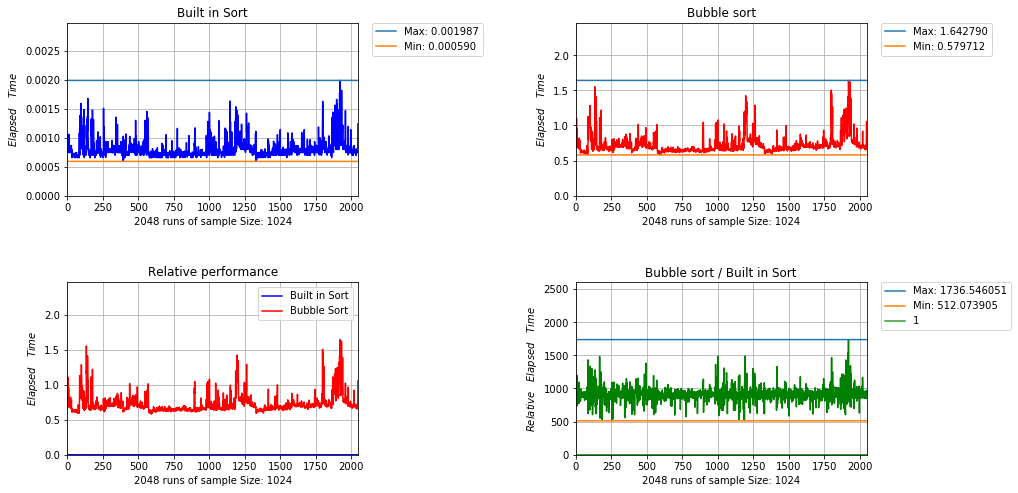

In [62]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 2048 elements

In [63]:
sample_size = 2048
test_size = 2048

In [64]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 2048


In [65]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00164164
Comparison average time:        2.73741568
Relative mean efficience:    1667.48424610
--------------------------------------------------------------------------------
Built in variance time:         0.000000044823
Comparison variance time:       0.050597301494
Relative variance:        1128827.251554310322


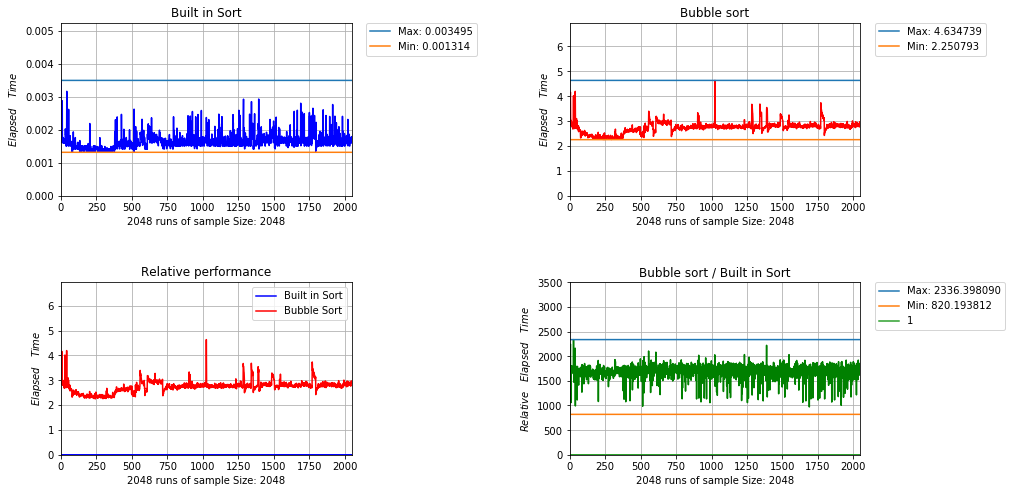

In [66]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

## Running 2048 times a sample with 4096 elements

In [67]:
sample_size = 4096
test_size = 2048

In [68]:
errors, pattern_time, cmp_time = run_tests(
    bubble_sort, clf_function, sample_size=sample_size, test_size=test_size)

print("In the end of the day {} error{} occurred in {} runs of size {}".
      format(errors, "s" if errors > 1 else "", test_size, sample_size))

In the end of the day 0 error occurred in 2048 runs of size 4096


In [69]:
average_pattern_time, average_cmp_time = comparison_report(pattern_time, cmp_time)
growth_behaviour.append(AverageTime(average_pattern_time, average_cmp_time, sample_size))

Built in average time:          0.00371342
Comparison average time:       11.55913126
Relative mean efficience:    3112.79672465
--------------------------------------------------------------------------------
Built in variance time:         0.000000143734
Comparison variance time:       0.286423356013
Relative variance:        1992725.883178265765


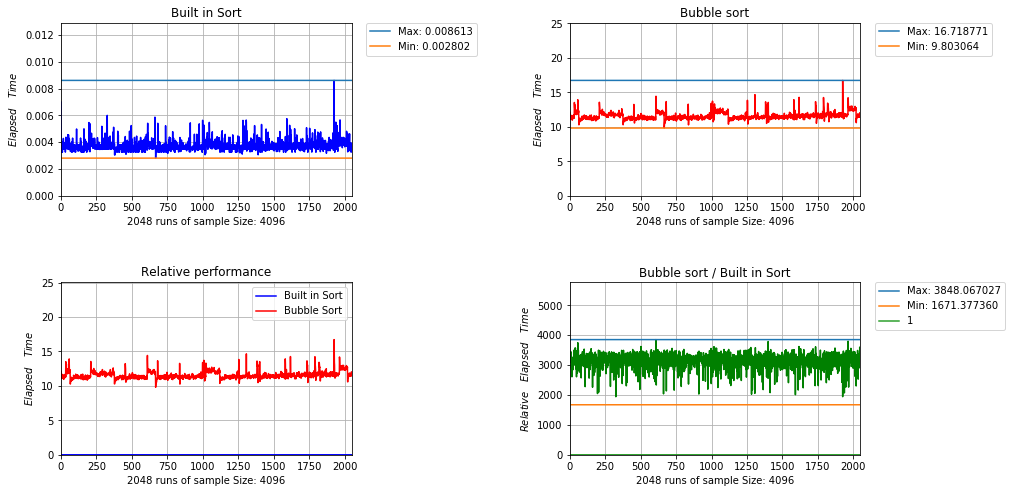

In [70]:
plot_graphics(pattern_time, cmp_time, test_size, sample_size)

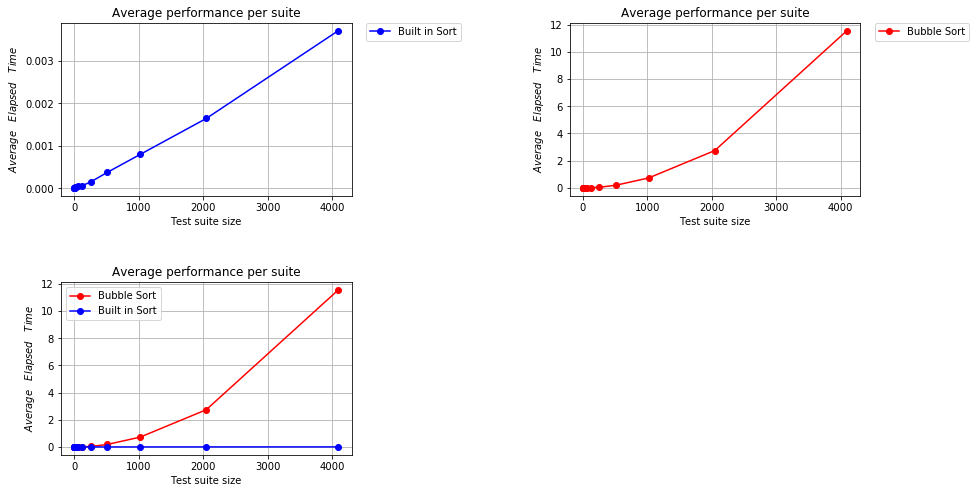

In [71]:
plot_growth_graphics(growth_behaviour)